# Lab | Natural Language Techniques


In [1]:
# import libraries - import pandas, matplotlib/seaborn and textblob
import pandas as pd
import matplotlib.pyplot as plt
from textblob import TextBlob 
import seaborn as sns


In [2]:
# read the data into a dataframe with pandas
data = pd.read_csv('womens_clothing_ecommerce_reviews.csv')
data.head() 

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [3]:
# filter the data frame to a relevant subset of columns required for our data scenario (image clothing_columns.png)
data.columns

Index(['Unnamed: 0', 'Clothing ID', 'Age', 'Title', 'Review Text', 'Rating',
       'Recommended IND', 'Positive Feedback Count', 'Division Name',
       'Department Name', 'Class Name'],
      dtype='object')

In [4]:
df = data[['Clothing ID','Title', 'Review Text', 'Rating', 'Department Name', 'Class Name']]
df.head()

,Clothing ID,Title,Review Text,Rating,Department Name,Class Name
0,767,NaN,Absolutely wonderful - silky and sexy and comf...,4,Intimate,Intimates
1,1080,NaN,Love this dress! it's sooo pretty. i happene...,5,Dresses,Dresses
2,1077,Some major design flaws,I had such high hopes for this dress and reall...,3,Dresses,Dresses
3,1049,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,Bottoms,Pants
4,847,Flattering shirt,This shirt is very flattering to all due to th...,5,Tops,Blouses


In [5]:
# use df.columns.str.lower() (or other preferred method) to standardise your column headers
df.columns = df.columns.str.lower()
df.head()
# other way to do the same: df.columns = [column.lower() for column in df.columns]

,clothing id,title,review text,rating,department name,class name
0,767,NaN,Absolutely wonderful - silky and sexy and comf...,4,Intimate,Intimates
1,1080,NaN,Love this dress! it's sooo pretty. i happene...,5,Dresses,Dresses
2,1077,Some major design flaws,I had such high hopes for this dress and reall...,3,Dresses,Dresses
3,1049,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,Bottoms,Pants
4,847,Flattering shirt,This shirt is very flattering to all due to th...,5,Tops,Blouses


## EDA

EDA - with descriptive statistics (eg describe(), shape, info()) and/or simple charts, explore and familiarise yourself with the data at your own pace - clarify what each column means/contains and what cleaning steps could be employed (and if needed for our scenario)


In [6]:
df.describe()
# the clothing id column doesn't work as a numeric column - should we convert it to str because it makes no sense to store it as numbers?
# the mean rating is: 4.19
# the range of rating is : 1-5

,clothing id,rating
count,23486.000000,23486.000000
mean,918.118709,4.196032
std,203.298980,1.110031
min,0.000000,1.000000
25%,861.000000,4.000000
50%,936.000000,5.000000
75%,1078.000000,5.000000
max,1205.000000,5.000000


In [7]:
df.shape
# there are 23486 rows

(23486, 6)

In [8]:
df.info()
# clothing id and rating haven't nulls (0%)
# the rest of columns have nulls (title(16.22%), review text(3.59%), dep name(0.06%), class name(0.06%))
# title is the one with more nulls from the six columns (16.22%)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   clothing id      23486 non-null  int64 
 1   title            19676 non-null  object
 2   review text      22641 non-null  object
 3   rating           23486 non-null  int64 
 4   department name  23472 non-null  object
 5   class name       23472 non-null  object
dtypes: int64(2), object(4)
memory usage: 1.1+ MB


In [9]:
# calculate the percentage of nulls
def percentage(part, whole):
  return 100 * float(part)/float(whole)

# print(percentage(19676, 23486))
# If you want to limit the number of decimal to 2, change the number in {:.2f} as you wish;
print('match data:','{:.2f}'.format(percentage(19676, 23486)),'%')
print('nulls:',(100 - 83.78),'%')

match data: 83.78 %
nulls: 16.22 %


In [10]:
# more optimazed way of obtaining the percentage of nulls
round((df.isnull().sum()*100/len(df)),3)
# theoretically is the same process but it gives different numbers, why?? 

clothing id         0.000
title              16.222
review text         3.598
rating              0.000
department name     0.060
class name          0.060
dtype: float64

In [11]:
#check uniques of the original dataframe
for feature in data.columns.tolist():
    print(feature, len(data[feature].unique()))

Unnamed: 0 23486
Clothing ID 1206
Age 77
Title 13994
Review Text 22635
Rating 5
Recommended IND 2
Positive Feedback Count 82
Division Name 4
Department Name 7
Class Name 21


In [12]:
data.nunique()

Unnamed: 0                 23486
Clothing ID                 1206
Age                           77
Title                      13993
Review Text                22634
Rating                         5
Recommended IND                2
Positive Feedback Count       82
Division Name                  3
Department Name                6
Class Name                    20
dtype: int64

In [13]:
#check uniques of the selection
for feature in df.columns.tolist():
    print(feature, len(df[feature].unique()))

clothing id 1206
title 13994
review text 22635
rating 5
department name 7
class name 21


In [14]:
df.nunique()

clothing id         1206
title              13993
review text        22634
rating                 5
department name        6
class name            20
dtype: int64

In [15]:
df['department name'].unique()

array(['Intimate', 'Dresses', 'Bottoms', 'Tops', 'Jackets', 'Trend', nan],
      dtype=object)

In [16]:
df['class name'].unique()

array(['Intimates', 'Dresses', 'Pants', 'Blouses', 'Knits', 'Outerwear',
       'Lounge', 'Sweaters', 'Skirts', 'Fine gauge', 'Sleep', 'Jackets',
       'Swim', 'Trend', 'Jeans', 'Legwear', 'Shorts', 'Layering',
       'Casual bottoms', nan, 'Chemises'], dtype=object)

In [17]:
# use the pandas groupby function to summarise the average rating by division and department as a new dataframe (image clothing_rating_groupby.png)
merged_df = df.groupby(['department name','class name'], as_index=False) \
       .agg(rating_count=('rating', 'size'), rating_mean=('rating', 'mean'))
merged_df

,department name,class name,rating_count,rating_mean
0,Bottoms,Casual bottoms,2,4.500000
1,Bottoms,Jeans,1147,4.360942
2,Bottoms,Pants,1388,4.265850
3,Bottoms,Shorts,317,4.255521
4,Bottoms,Skirts,945,4.245503
5,Dresses,Dresses,6319,4.150815
6,Intimate,Chemises,1,4.000000
7,Intimate,Intimates,154,4.279221
8,Intimate,Layering,146,4.376712
9,Intimate,Legwear,165,4.278788


In [18]:
# do a spot /sample check on the review column, index position 5 (hint: iloc/loc/at) to apply textblob over the selected review text (image clothing_sentiment_index5.png) Do this for at least 3 samples to evaluate the accuracy of the sentiment polarity and subjectivity against the text itself
review_check1 = TextBlob(df.at[5, 'review text'])
review_check1.sentiment

Sentiment(polarity=0.17874999999999996, subjectivity=0.533125)

In [19]:
# for the any selected customer review, use textblob to break out the text into sentences (image clothing_sentences.png)
print(df['review text'][5])

I love tracy reese dresses, but this one is not for the very petite. i am just under 5 feet tall and usually wear a 0p in this brand. this dress was very pretty out of the package but its a lot of dress. the skirt is long and very full so it overwhelmed my small frame. not a stranger to alterations, shortening and narrowing the skirt would take away from the embellishment of the garment. i love the color and the idea of the style but it just did not work on me. i returned this dress.


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   clothing id      23486 non-null  int64 
 1   title            19676 non-null  object
 2   review text      22641 non-null  object
 3   rating           23486 non-null  int64 
 4   department name  23472 non-null  object
 5   class name       23472 non-null  object
dtypes: int64(2), object(4)
memory usage: 1.1+ MB


In [21]:
# using dropna, remove any rows in your data which contain have null in the review column ( hint your new data will be 22641 rows)

df = df.dropna(axis=0, subset=['review text'])

# other ways of doing/writting the same:
# df.dropna(subset=[2]) 
# df = df.dropna(subset=['review text'])

In [22]:
import warnings
warnings.filterwarnings("ignore")

In [23]:
# define a function with lambda (or other preferred method) to calculate sentiment polarity for each row of the filtered review data set, as a new column on the data frame. (image clothing_sentiment_allrows.png)

def sentiment_polarity(text):
    try: 
        return TextBlob(text).sentiment 
    except:
        return None

df['polarity'] = df['review text'].apply(sentiment_polarity).apply(lambda x:x[0])
df.head()

# clothingdf['sentiment']=clothingdf['review text'].apply(lambda x:TextBlob(x).sentiment.polarity)

,clothing id,title,review text,rating,department name,class name,polarity
0,767,NaN,Absolutely wonderful - silky and sexy and comf...,4,Intimate,Intimates,0.633333
1,1080,NaN,Love this dress! it's sooo pretty. i happene...,5,Dresses,Dresses,0.339583
2,1077,Some major design flaws,I had such high hopes for this dress and reall...,3,Dresses,Dresses,0.073675
3,1049,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,Bottoms,Pants,0.550000
4,847,Flattering shirt,This shirt is very flattering to all due to th...,5,Tops,Blouses,0.512891


In [24]:
df['sentiment']=df['review text'].apply(lambda x:TextBlob(x).sentiment.polarity)
df['sentiment']

0        0.633333
1        0.339583
2        0.073675
3        0.550000
4        0.512891
           ...   
23481    0.552667
23482    0.091667
23483    0.414286
23484    0.322222
23485    0.413889
Name: sentiment, Length: 22641, dtype: float64

In [25]:
# using the pandas groupby function again, summarise the minimum review polarity, by division and department as a new dataframe (image clothing_min_review.png) - this means whats the lowest sentiment score seen in each department and division - so everything will be less than 0

df_groupby_minreview = df.groupby(['department name','class name'], as_index=False)['polarity'].min()
df_groupby_minreview

,department name,class name,polarity
0,Bottoms,Casual bottoms,0.330000
1,Bottoms,Jeans,-0.533333
2,Bottoms,Pants,-0.447917
3,Bottoms,Shorts,-0.195000
4,Bottoms,Skirts,-0.266667
5,Dresses,Dresses,-0.916667
6,Intimate,Chemises,0.600000
7,Intimate,Intimates,-0.308333
8,Intimate,Layering,-0.090705
9,Intimate,Legwear,-0.230000


In [26]:
df_by_div=df.groupby(['department name']).agg({'sentiment' : 'mean'})
df_by_div

,sentiment
department name,
Bottoms,0.250298
Dresses,0.249977
Intimate,0.254581
Jackets,0.238888
Tops,0.250411
Trend,0.202415


In [27]:
df_groupby_minreview.columns = ['department_name','class_name','polarity']

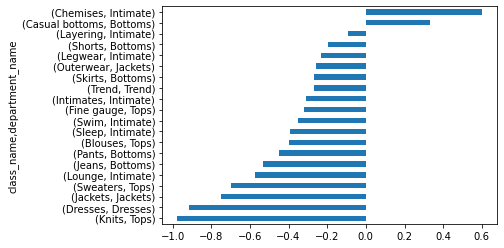

In [28]:
# visualise this summary as a simple sorted bar chart (image clothing_min_review_chart.png)
df_sortedbar = df_groupby_minreview.groupby(['class_name', 'department_name'])['polarity'].min().sort_values()
df_sortedbar.plot(kind='barh');

In [29]:
# using the pandas groupby function again, summarise the average review polarity, by division and department as a new dataframe
df_groupby_avgrevpol = df.groupby(['department name','class name'], as_index=False)['polarity'].mean()
df_groupby_avgrevpol

,department name,class name,polarity
0,Bottoms,Casual bottoms,0.330000
1,Bottoms,Jeans,0.251393
2,Bottoms,Pants,0.244833
3,Bottoms,Shorts,0.248430
4,Bottoms,Skirts,0.257670
5,Dresses,Dresses,0.249977
6,Intimate,Chemises,0.600000
7,Intimate,Intimates,0.263857
8,Intimate,Layering,0.256187
9,Intimate,Legwear,0.260167


In [30]:
df_groupby_avgrevpol.columns = ['department_name','class_name','polarity']

<AxesSubplot:xlabel='polarity', ylabel='class_name'>

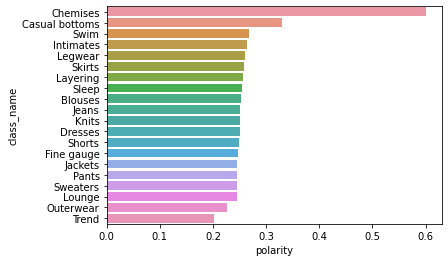

In [31]:
# visualise this summary as a simple sorted bar chart
sns.barplot(x='polarity', y='class_name', data = df_groupby_avgrevpol, order=df_groupby_avgrevpol.sort_values('polarity', ascending=False).class_name)

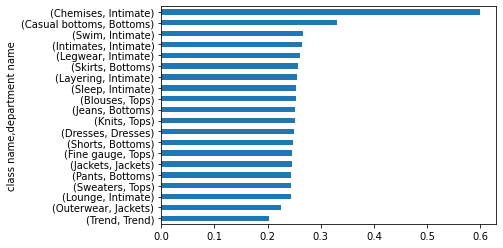

In [32]:
# this dataframe can be easily visualised as a bar chart - do so now (image clothing_rating_chart.png)


df_barchart= df.groupby(['class name', 'department name'])['polarity'].mean().sort_values()
df_barchart.plot(kind='barh');


**Stretch guidance (optional follow on activities)**
- how accurate is the sentiment polarity calculated on this data set? how can you tell ?
- what are the most useful ways to visualise the sentiment polarity against the other data in the reviews data set? (hint: tableau or seaborn, exploratory data visualisation) - I have started this in Tableau - heres my workbook
- through sample /limited experimentation, investigate whether processing / cleaning the review text might lead to a more accurate sentiment calculation
- textblob has an alternative, naive bayes sentiment analyser that is trained on movie reviews - do you think this could be more accurate? what features would you choose to include if training a sentiment analysis model ?
- could there be advantages to utilising spacy+textblob instead? why? how would you identify a sentiment tool better suited to this data set?
- install the needed packages and apply a second sentiment analysis method, end to end to evaluate the accuracy of the first approach
- summarise what you have learnt in a .md file to accompany your notebook or annotations /images in the notebook itself
- tidy up your code as much as possible, consider modularising any elements of what you have done for re-usability and efficiency